<a href="https://colab.research.google.com/github/karthik19-cloud/GenAI-Training/blob/main/01-product-sales-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# ============================================
# 📊 Multivariate Linear Regression Model
# Predicting Sales based on Advertising Budgets
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# =====================
# 1️⃣ Load the Dataset
# =====================
df = pd.read_csv('/content/sample_data/advertising.csv')

# Display dataset
print("✅ Dataset Loaded Successfully:")
print(df.head())

✅ Dataset Loaded Successfully:
   TV Budget ($)  Radio Budget ($)  Newspaper Budget ($)  Sales (units)
0          230.1              37.8                  69.2           22.1
1           44.5              39.3                  45.1           10.4
2           17.2              45.9                  69.3            9.3
3          151.5              41.3                  58.5           18.5
4          180.8              10.8                  58.4           12.9


In [32]:
# ===========================
# 2️⃣ Explore the Data
# ===========================
print("\nDataset Summary:")
print(df.describe())

# Correlation Matrix
#plt.figure(figsize=(8,6))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("🔗 Correlation Heatmap of Features")
#plt.show()

# Pairplot (relationships between variables)
#sns.pairplot(df)
#plt.suptitle("📈 Pairplot of Advertising Budgets vs Sales", y=1.02)
#plt.show()


Dataset Summary:
       TV Budget ($)  Radio Budget ($)  Newspaper Budget ($)  Sales (units)
count      10.000000         10.000000             10.000000      10.000000
mean      106.620000         30.500000             48.880000      13.320000
std        73.207541         14.398843             20.917074       4.409787
min         8.700000         10.800000             11.600000       7.200000
25%        47.750000         16.900000             38.500000      10.750000
50%       115.900000         35.300000             51.750000      12.550000
75%       149.650000         40.800000             66.525000      15.000000
max       230.100000         48.900000             75.000000      22.100000


In [33]:
# ===========================
# 3️⃣ Prepare Data for Model
# ===========================
X = df[['TV Budget ($)', 'Radio Budget ($)', 'Newspaper Budget ($)']]
y = df['Sales (units)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# ===========================
# 4️⃣ Train the Model
# ===========================
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
# ===========================
# 5️⃣ Evaluate the Model
# ===========================
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients)
print(f"\nIntercept: {model.intercept_:.2f}")


📊 Model Evaluation:
Mean Squared Error (MSE): 2.40
R-squared (R²): 0.64

Model Coefficients:
                Feature  Coefficient
0         TV Budget ($)     0.070397
1      Radio Budget ($)     0.197522
2  Newspaper Budget ($)    -0.060750

Intercept: 2.58


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


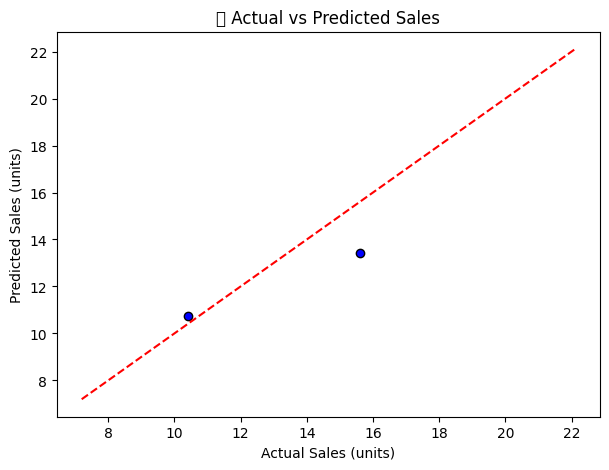

In [36]:
# ===========================
# 6️⃣ Visualization
# ===========================

# Actual vs Predicted plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.xlabel("Actual Sales (units)")
plt.ylabel("Predicted Sales (units)")
plt.title("🎯 Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

In [37]:
# ===========================
# 7️⃣ Predict on New Data
# ===========================
new_data = pd.DataFrame({
    'TV Budget ($)': [150],
    'Radio Budget ($)': [20],
    'Newspaper Budget ($)': [30]
})
predicted_sales = model.predict(new_data)
print(f"\n🔮 Predicted Sales for new data: {predicted_sales[0]:.2f} units")


🔮 Predicted Sales for new data: 15.26 units
